In [2]:
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Move the Kaggle API token to the required directory
!mkdir -p ~/.kaggle
!cp '/content/drive/My Drive/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset directly to Google Drive
!kaggle datasets download -d bryanqtnguyen/benign-and-malignant-skin-lesion-dataset -p "/content/drive/My Drive/" --unzip


100% 832M/836M [00:15<00:00, 60.0MB/s]
100% 836M/836M [00:15<00:00, 58.1MB/s]


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [6]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [5]:


# Import the necessary libraries
from google.colab import drive
from kaggle.api.kaggle_api_extended import KaggleApi
import os



# Specify the path to your Kaggle API token JSON file in Google Drive
kaggle_json_path = '/content/drive/My Drive/kaggle.json'

# Set the Kaggle config directory to the directory containing your Kaggle API token JSON file
os.environ['KAGGLE_CONFIG_DIR'] = os.path.dirname(kaggle_json_path)

# Define the dataset name and destination directory in Google Drive
dataset_name = 'bryanqtnguyen/benign-and-malignant-skin-lesion-dataset'
destination_dir = '/content/drive/My Drive/'

# Authenticate with the Kaggle API using your Kaggle API key stored in the JSON file
api = KaggleApi()
api.authenticate()

# Download the dataset zip file
api.dataset_download_files(dataset_name, path=destination_dir, unzip=False)


In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [9]:
img_height, img_width = 64, 64
batch_size = 15

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/My Drive/Benign_Malignant_DataSet/MainData/train",
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/My Drive/Benign_Malignant_DataSet/MainData/validation",
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/My Drive/Benign_Malignant_DataSet/MainData/test",
    image_size=(img_height, img_width),
    batch_size=batch_size,
)


Found 3603 files belonging to 2 classes.
Found 426 files belonging to 2 classes.
Found 430 files belonging to 2 classes.


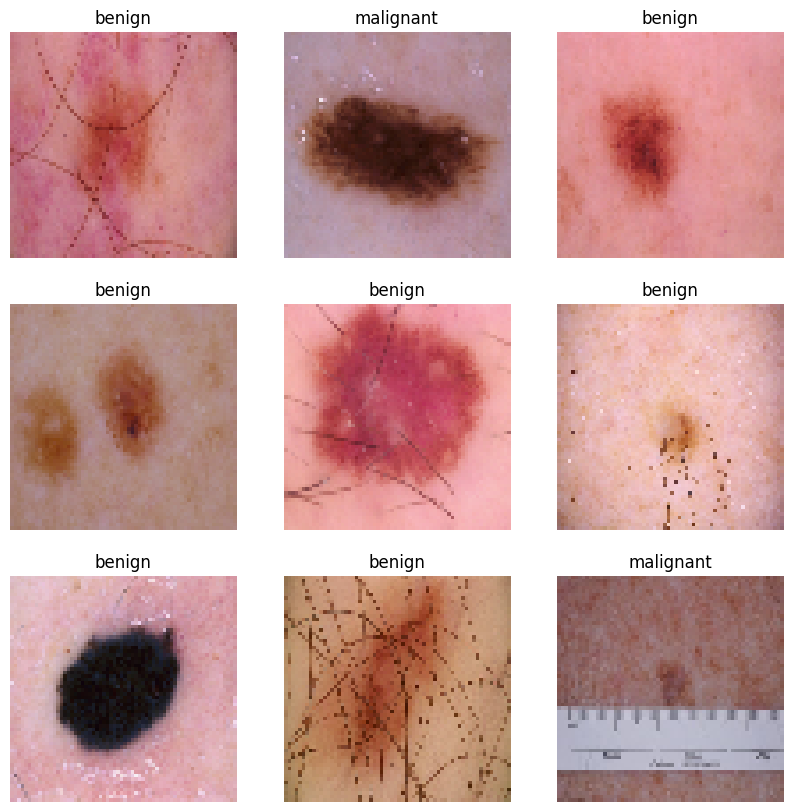

In [10]:
class_names = ["benign", "malignant"]
plt.figure(figsize = (10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

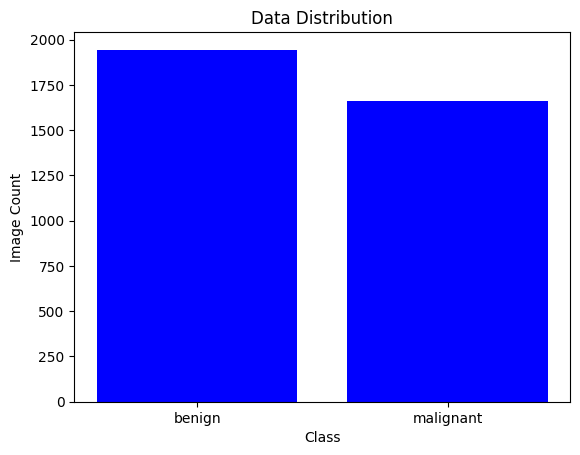

In [12]:
def count_class_occurrences(dataset):
    class_counts = {class_name: 0 for class_name in dataset.class_names}

    for _, labels in dataset:
        for label in labels.numpy():
            class_counts[dataset.class_names[label]] += 1

    return class_counts

train_class_counts = count_class_occurrences(train_ds)
validation_class_counts = count_class_occurrences(validation_ds)
test_class_counts = count_class_occurrences(test_ds)

plt.bar(train_class_counts.keys(), train_class_counts.values(), label='Train', color = 'blue')
plt.bar(validation_class_counts.keys(), validation_class_counts.values(), label='Validation', color = 'blue')
plt.bar(test_class_counts.keys(), test_class_counts.values(), label='Test', color = 'blue')
plt.title('Data Distribution')
plt.xlabel('Class')
plt.ylabel('Image Count')
plt.show()

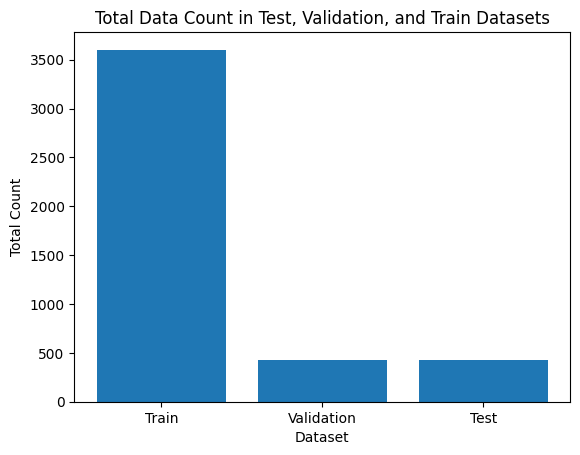

In [13]:
def count_class_occurrences(dataset):
    class_counts = {class_name: 0 for class_name in dataset.class_names}

    for _, labels in dataset:
        for label in labels.numpy():
            class_counts[dataset.class_names[label]] += 1

    return class_counts

train_class_counts = count_class_occurrences(train_ds)
validation_class_counts = count_class_occurrences(validation_ds)
test_class_counts = count_class_occurrences(test_ds)

plt.bar(['Train', 'Validation', 'Test'], [sum(train_class_counts.values()), sum(validation_class_counts.values()), sum(test_class_counts.values())])
plt.title('Total Data Count in Test, Validation, and Train Datasets')
plt.xlabel('Dataset')
plt.ylabel('Total Count')
plt.show()

In [15]:
from tensorflow.keras.optimizers import Adagrad
model.compile(
    optimizer= "Adagrad",
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

Epoch 1/20
241/241 [==============================] - 114s 445ms/step - loss: 0.6336 - accuracy: 0.7200 - val_loss: 1.1833 - val_accuracy: 0.4953
Epoch 2/20
241/241 [==============================] - 105s 422ms/step - loss: 0.5117 - accuracy: 0.7608 - val_loss: 0.6386 - val_accuracy: 0.6690
Epoch 3/20
241/241 [==============================] - 113s 455ms/step - loss: 0.4845 - accuracy: 0.7785 - val_loss: 0.4799 - val_accuracy: 0.7723
Epoch 4/20
241/241 [==============================] - 110s 443ms/step - loss: 0.4519 - accuracy: 0.7932 - val_loss: 0.4701 - val_accuracy: 0.7793
Epoch 5/20
241/241 [==============================] - 108s 431ms/step - loss: 0.4409 - accuracy: 0.7949 - val_loss: 0.4657 - val_accuracy: 0.7746
Epoch 6/20
241/241 [==============================] - 111s 448ms/step - loss: 0.4382 - accuracy: 0.7963 - val_loss: 0.4639 - val_accuracy: 0.7840
Epoch 7/20
241/241 [==============================] - 107s 431ms/step - loss: 0.4177 - accuracy: 0.8082 - val_loss: 0.4698 -

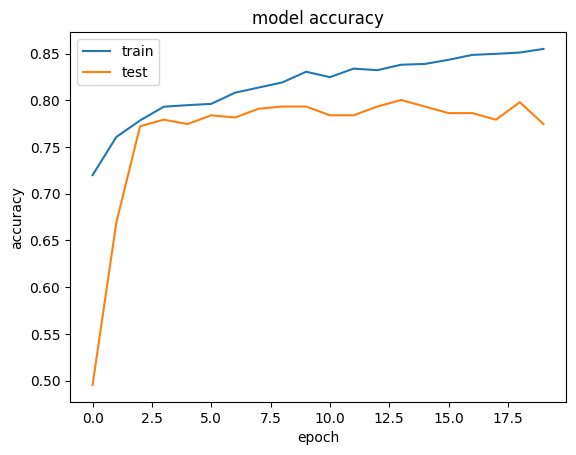

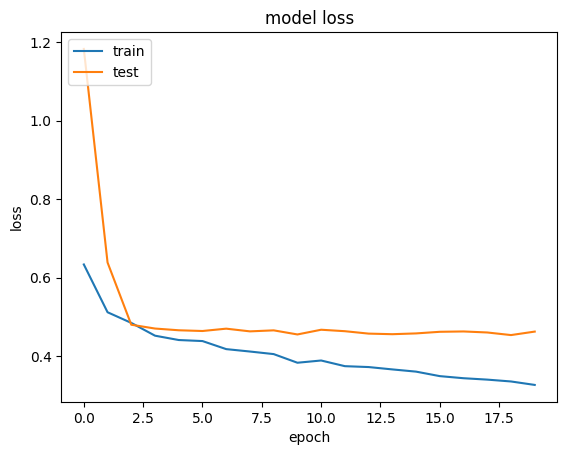

In [16]:
history = model.fit(
    train_ds,
    validation_data = validation_ds,
    epochs = 20
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  print(classifications)

tf.Tensor(
[[ 4.53846    -1.78415    -2.748355  ]
 [ 1.0764658   1.6534446  -3.1314638 ]
 [ 1.9122472   2.238716   -3.8441172 ]
 [ 4.4526796  -1.3933383  -3.5214841 ]
 [-0.21643692  3.0090816  -4.2937818 ]
 [ 3.1659265  -0.0863551  -2.6828802 ]
 [ 3.9652627  -1.6774069  -3.026252  ]
 [ 3.1523685   0.44522157 -3.2277749 ]
 [ 2.5089123   1.1319767  -3.4854124 ]
 [ 0.5641115   3.1110177  -3.6152089 ]
 [ 2.0325756   0.90309876 -3.4936392 ]
 [ 4.5389504  -1.9670864  -3.3162668 ]
 [ 0.5088904   3.3016677  -3.768638  ]
 [ 0.24978608  2.716019   -3.6781065 ]
 [ 3.1618342   0.3555565  -3.9079442 ]], shape=(15, 3), dtype=float32)


<Figure size 1000x1000 with 0 Axes>

In [19]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("modelFinal1.tflite", 'wb') as f:
  f.write(tflite_model)

In [22]:
import pickle
pickle_file_path = '/content/drive/My Drive/basicmodel.pkl'
with open(pickle_file_path, 'wb') as f:
    pickle.dump(model, f)

In [23]:
tflite_model_path = '/content/drive/My Drive/modelFinal1.tflite'

# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to Google Drive
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0
